In [1]:
import pandas as pd

review = pd.read_csv("clustering.csv", header=None)
review

,0,1
0,검색어,기사내용
1,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
2,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
3,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
4,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
5,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...
6,라돈,"최근 침대 매트리스에 이어 온수매트에서도 라돈이 검출됐다는 소식이 알려지면서, 가정..."
7,라돈,"침대, 생리대, 마스크 등에서 라돈이 검출되면서, 발암 물질 ‘라돈’에 대한 관심..."
8,라돈,하이젠 온수매트가 '라돈 온수매트'로 언급되고 있다.\n\n최근 한 온라인커뮤니티에...
9,라돈,겨울 난방 제품인 온수매트에서 라돈이 검출된 가운데 해당 업체가 별 문제가 되지 않...


In [2]:
from konlpy.tag import Okt
okt = Okt()

In [3]:
docs=[]

for i in review[0]:
    docs.append(okt.nouns(i))

In [4]:
review.loc[5]

0                                                 유한양행
1    유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...
Name: 5, dtype: object

In [5]:
def get_nouns(text):
    nouns=okt.nouns(text)
    nouns=[word for word in nouns if len(word)>1]
    return nouns

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(tokenizer=get_nouns)

tdm= cv.fit_transform(review[0])

In [7]:
cv.get_feature_names()[:10]

['검색어', '라돈', '복면', '왕밤빵', '유한양행']

In [8]:
cv.vocabulary_

{'검색어': 0, '유한양행': 4, '라돈': 1, '복면': 2, '왕밤빵': 3}

In [9]:
doc=tdm[0].toarray()
doc

array([[1, 0, 0, 0, 0]], dtype=int64)

In [10]:
count=tdm.sum(axis=0)
count

matrix([[1, 5, 5, 5, 5]], dtype=int64)

In [11]:
word_count=pd.DataFrame({"단어": cv.get_feature_names(),
                        "빈도": count.flat})
word_count.head()

,단어,빈도
0,검색어,1
1,라돈,5
2,복면,5
3,왕밤빵,5
4,유한양행,5


In [12]:
word_count.sort_values(by="빈도", ascending=False)

,단어,빈도
1,라돈,5
2,복면,5
3,왕밤빵,5
4,유한양행,5
0,검색어,1


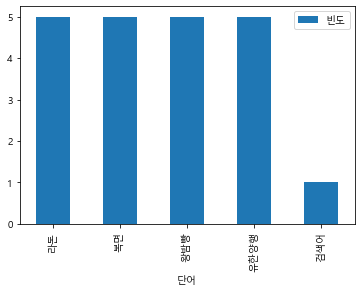

In [13]:
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

word_count_index = word_count.copy()
word_count_index.index=word_count_index["단어"]
word_count_index.sort_values(by="빈도", ascending=False)[:10].plot.bar()
plt.show()

In [14]:
docs_noun = docs.copy()

for i in range(len(docs_noun)):
    docs_noun[i] = ' '.join(docs_noun[i])

    
    docs_noun

In [15]:
noun_doc = ' '.join(docs_noun)
noun_doc = noun_doc.strip()
noun_doc

'검색어 유한양행 유한양행 유한양행 유한양행 유한양행 라돈 라돈 라돈 라돈 라돈 복면 왕 왕밤빵 복면 왕 왕밤빵 복면 왕 왕밤빵 복면 왕 왕밤빵 복면 왕 왕밤빵'

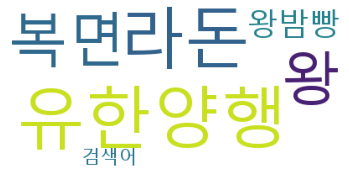

In [16]:
from wordcloud import WordCloud

font_path = "C:/Windows/Fonts/malgun.ttf"

'''from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
re('font', family=font)'''

wc = WordCloud(font_path=font_path, background_color="white")
wc.generate(noun_doc)

plt.figure()
plt.imshow(wc)
plt.axis("off")
plt.show()

In [17]:
import gensim
from gensim import corpora, models

resultList = []
keyword = 5

texts=[]
for line in docs:
    tokens = [word for word in line if len(word) > 1]
    texts.append(tokens)
    
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5)

for num in range(5):
    resultList.append(ldamodel.show_topic(num, keyword))

C:\Users\Lee\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [18]:
resultList

[[('왕밤빵', 0.41817793),
  ('복면', 0.41814268),
  ('검색어', 0.117530406),
  ('유한양행', 0.023719061),
  ('라돈', 0.022429962)],
 [('유한양행', 0.21173345),
  ('라돈', 0.21030359),
  ('복면', 0.19616376),
  ('왕밤빵', 0.1938338),
  ('검색어', 0.18796545)],
 [('유한양행', 0.2146821),
  ('라돈', 0.21255744),
  ('왕밤빵', 0.1944349),
  ('복면', 0.19021526),
  ('검색어', 0.1881103)],
 [('유한양행', 0.6415338),
  ('복면', 0.15236966),
  ('왕밤빵', 0.15153502),
  ('라돈', 0.028222298),
  ('검색어', 0.02633923)],
 [('라돈', 0.85524976),
  ('유한양행', 0.037831903),
  ('왕밤빵', 0.03634065),
  ('복면', 0.035643943),
  ('검색어', 0.034933727)]]

In [19]:
ldamodel.print_topics(num_words=5)

[(0, '0.418*"왕밤빵" + 0.418*"복면" + 0.118*"검색어" + 0.024*"유한양행" + 0.022*"라돈"'),
 (1, '0.212*"유한양행" + 0.210*"라돈" + 0.196*"복면" + 0.194*"왕밤빵" + 0.188*"검색어"'),
 (2, '0.215*"유한양행" + 0.213*"라돈" + 0.194*"왕밤빵" + 0.190*"복면" + 0.188*"검색어"'),
 (3, '0.642*"유한양행" + 0.152*"복면" + 0.152*"왕밤빵" + 0.028*"라돈" + 0.026*"검색어"'),
 (4, '0.855*"라돈" + 0.038*"유한양행" + 0.036*"왕밤빵" + 0.036*"복면" + 0.035*"검색어"')]

In [20]:
ldamodel.get_document_topics(corpus)[0]

[(0, 0.5990639),
 (1, 0.10042119),
 (2, 0.100427516),
 (3, 0.100037254),
 (4, 0.10005018)]